# PyCity Schools Analysis

* As a whole, schools with higher budgets, did not yield better test results. By contrast, schools with higher spending 645-675 per student actually underperformed compared to schools with smaller budgets (585 per student).

* As a whole, smaller and medium sized schools dramatically out-performed large sized schools on passing math performances (89-91% passing vs 67%).

* As a whole, charter schools out-performed the public district schools across all metrics. However, more analysis will be required to glean if the effect is due to school practices or the fact that charter schools tend to serve smaller student populations per school. 
---

In [7]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)


# Combine the data into a single dataset.  
sdc = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
sdc.head()
#school_data.head()
#student_data.head()


,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

In [8]:
# Calculate the total number of unique schools
school_count =len(sdc["school_name"].unique()) 


In [9]:
# Calculate the total number of students
student_count =len(sdc["student_name"])

In [10]:
# Calculate the total budget
total_budget = school_data["budget"].sum()

In [11]:
# Calculate the average (mean) math score
average_math_score = sdc["math_score"].mean()  

In [12]:
# Calculate the average (mean) reading score
average_reading_score = sdc["reading_score"].mean() 

In [13]:
# Use the following to calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = sdc[(sdc["math_score"] >= 70)].count()["student_name"]
passing_math_percentage = passing_math_count / float(student_count) * 100

In [14]:
# Calculate the percentage of students who passeed reading (hint: look at how the math percentage was calculated)  
passing_reading_count = sdc[(sdc["reading_score"] >= 70)].count()["student_name"]
passing_reading_percentage = passing_reading_count / float(student_count) * 100

In [15]:
# Use the following to calculate the percentage of students that passed math and reading
passing_math_reading_count = sdc[(sdc["math_score"] >= 70) & (sdc["reading_score"] >= 70)].count()["student_name"]
overall_passing_rate = passing_math_reading_count /  float(student_count) * 100

In [16]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
district_summary = pd.DataFrame({'Total Schools': [school_count], 'Total Students': [student_count],
'Total Budget': [total_budget], "Average Math Score": [average_math_score], "Average Reading Score":
[average_reading_score], '% Passing Math': [passing_math_percentage], 
'% Passing Reading': [passing_reading_percentage], '% Overall Passing': [overall_passing_rate]})

# Formatting
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

# Display the DataFrame
district_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary

In [17]:
# Use the code provided to select the school type
school_types = school_data.set_index(["school_name"])["type"]


In [18]:
# Calculate the total student count
school_students = school_data.set_index(["school_name"])["size"]

In [19]:
# Calculate the total school budget and per capita spending
per_school_budget = sdc.groupby(["school_name"]).mean()["budget"]
per_school_capita = per_school_budget / school_students


In [20]:
# Calculate the average test scores
per_school_math =sdc.groupby(["school_name"]).mean()["math_score"]
per_school_reading = sdc.groupby(["school_name"]).mean()["reading_score"]


In [21]:
# Calculate the number of schools with math scores of 70 or higher
school_passing_math =(sdc.groupby("school_name")["math_score"].apply(lambda x: (x>=70).sum()))/school_students*100

In [22]:
# Calculate the number of schools with reading scores of 70 or higher
school_passing_reading =(sdc.groupby("school_name")["reading_score"].apply(lambda x: (x>=70).sum()))/school_students*100

In [23]:
passmare = sdc.loc[(sdc['reading_score'] >= 70) & (sdc['math_score'] >= 70), :]
passing_math_and_reading = (passmare.groupby(["school_name"]).count()["reading_score"])/school_students*100


In [24]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.
# Formatting
#per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
#per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)
# Display the DataFrame
#per_school_summary

In [25]:
per_school_summary=pd.DataFrame({"School Type": school_types, "Total Students": school_students,
"Total School Budget": per_school_budget, "Per Student Budget": per_school_capita, 
"Average Math Score": per_school_math, "Average Reading Score": per_school_reading, 
"% Passing Math": school_passing_math, "% Passing Reading": school_passing_reading,
 "% Overall Passing": passing_math_and_reading})

per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)
per_school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Highest-Performing Schools (by % Overall Passing)

In [26]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
pss_des = per_school_summary.sort_values("% Overall Passing", ascending=False)
pss_des.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Bottom Performing Schools (By % Overall Passing)

In [27]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
pss_asc = per_school_summary.sort_values("% Overall Passing", ascending=True)
pss_asc.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Math Scores by Grade

In [28]:
# Use the code provided to separate the data by grade
ninth_graders = sdc[(sdc["grade"] == "9th")]
tenth_graders = sdc[(sdc["grade"] == "10th")]
eleventh_graders = sdc[(sdc["grade"] == "11th")]
twelfth_graders = sdc[(sdc["grade"] == "12th")]

nine = ninth_graders.groupby(["school_name"]).mean()
ten = tenth_graders.groupby(["school_name"]).mean() 
elev = eleventh_graders.groupby(["school_name"]).mean() 
twel = twelfth_graders.groupby(["school_name"]).mean() 

# Use the code to select only the `math_score`.

ninem = nine["math_score"]
tenm = ten["math_score"]
elevm = elev["math_score"]
twelm = twel["math_score"]

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
math_scores_by_grade = pd.DataFrame({"9th": ninem, "10th": tenm, "11th": elevm,"12th": twelm})

# Minor data wrangling
#math_scores_by_grade = math_scores_by_grade[["9th", "10th", "11th", "12th"]]
math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade

,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 

In [29]:
niner = nine["reading_score"]
tenr = ten["reading_score"]
elevr = elev["reading_score"]
twelr = twel["reading_score"]

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
reading_scores_by_grade = pd.DataFrame({"9th": niner, "10th": tenr, "11th": elevr,"12th": twelr})

# Minor data wrangling
#math_scores_by_grade = math_scores_by_grade[["9th", "10th", "11th", "12th"]]
reading_scores_by_grade.index.name = None

# Display the DataFrame
reading_scores_by_grade

,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending

In [30]:
# Establish the bins 
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]

In [31]:

# Create a copy of the school summary since it has the "Per Student Budget" 
school_spending_df = per_school_summary.copy()
school_spending_df['Per Student Budget'] = school_spending_df['Per Student Budget'].str.replace("$", "").astype('float')


C:\Users\Nataliya\AppData\Local\Temp\ipykernel_5892\247843811.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  school_spending_df['Per Student Budget'] = school_spending_df['Per Student Budget'].str.replace("$", "").astype('float')


In [32]:
#school_spending_df["Per Student Budget"] = school_spending_df["Per Student Budget"].astype(int)
# Use `pd.cut` to categorize spending based on the bins.

school_spending_df["Spending Ranges (Per Student)"]=pd.cut(school_spending_df['Per Student Budget'], spending_bins, labels=labels)
school_spending_df


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
school_name,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",628.0,77.048432,81.033963,66.680064,81.933280,54.642283,$585-630
Cabrera High School,Charter,1858,"$1,081,356.00",582.0,83.061895,83.975780,94.133477,97.039828,91.334769,<$585
Figueroa High School,District,2949,"$1,884,411.00",639.0,76.711767,81.158020,65.988471,80.739234,53.204476,$630-645
Ford High School,District,2739,"$1,763,916.00",644.0,77.102592,80.746258,68.309602,79.299014,54.289887,$630-645
Griffin High School,Charter,1468,"$917,500.00",625.0,83.351499,83.816757,93.392371,97.138965,90.599455,$585-630
Hernandez High School,District,4635,"$3,022,020.00",652.0,77.289752,80.934412,66.752967,80.862999,53.527508,$645-680
Holden High School,Charter,427,"$248,087.00",581.0,83.803279,83.814988,92.505855,96.252927,89.227166,<$585
Huang High School,District,2917,"$1,910,635.00",655.0,76.629414,81.182722,65.683922,81.316421,53.513884,$645-680
Johnson High School,District,4761,"$3,094,650.00",650.0,77.072464,80.966394,66.057551,81.222432,53.539172,$645-680


In [33]:
#  Calculate averages for the desired columns. 
spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Math Score"]
spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Reading Score"]
spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Math"]
spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Reading"]
spending_passing_overall = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Overall Passing"]

In [34]:
# Assemble into DataFrame
spending_summary =pd.DataFrame({"Average Math Score": spending_math_scores, "Average Reading Score": spending_reading_scores,
"% Passing Math": spending_passing_math, "% Passing Reading": spending_passing_reading, 
"% Overall Passing": spending_passing_overall})


# Display results
spending_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,90.369459
$585-630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$645-680,76.997210,81.027843,66.164813,81.133951,53.526855


## Scores by School Size

In [35]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [36]:
# Categorize the spending based on the bins
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.

per_school_summary["School Size"] =pd.cut(school_spending_df['Total Students'], size_bins, labels=labels)

per_school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,School Size
school_name,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,Medium (1000-2000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,Large (2000-5000)
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,Medium (1000-2000)
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,Large (2000-5000)
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,Small (<1000)
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,Large (2000-5000)
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,Large (2000-5000)


In [37]:
# Calculate averages for the desired columns. 
size_math_scores = per_school_summary.groupby(["School Size"]).mean()["Average Math Score"]
size_reading_scores = per_school_summary.groupby(["School Size"]).mean()["Average Reading Score"]
size_passing_math = per_school_summary.groupby(["School Size"]).mean()["% Passing Math"]
size_passing_reading = per_school_summary.groupby(["School Size"]).mean()["% Passing Reading"]
size_overall_passing = per_school_summary.groupby(["School Size"]).mean()["% Overall Passing"]

In [38]:
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
# Use the scores above to create a new DataFrame called `size_summary`
size_summary=pd.DataFrame({"Average Math Score": size_math_scores, "Average Reading Score": size_reading_scores,
"% Passing Math": size_passing_math, "% Passing Reading": size_passing_reading, 
"% Overall Passing": size_overall_passing})

# Display results
size_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


## Scores by School Type

In [39]:
# Group the per_school_summary DataFrame by "School Type" and average the results.

type_math_scores = per_school_summary.groupby(["School Type"]).mean()["Average Math Score"]
type_reading_scores = per_school_summary.groupby(["School Type"]).mean()["Average Reading Score"]
type_passing_math = per_school_summary.groupby(["School Type"]).mean()["% Passing Math"]
type_passing_reading = per_school_summary.groupby(["School Type"]).mean()["% Passing Reading"]
type_overall_passing = per_school_summary.groupby(["School Type"]).mean()["% Overall Passing"]


In [40]:
# Assemble the new data by type into a DataFrame called `type_summary`
type_summary=pd.DataFrame({"Average Math Score": type_math_scores, "Average Reading Score": type_reading_scores,
"% Passing Math": type_passing_math, "% Passing Reading": type_passing_reading, 
"% Overall Passing": type_overall_passing})

# Display results
type_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208


In [41]:
# Hello Everyone
# Observing the data provided, we can make the following comments:
# District schools in comparison with Charter schools have much lower passing rate in math (66.55% vs 93.62%), 
# while the average math scores are not significantly different (76.96 vs 83.47). 
# We can also observe that large schools have lower math passing rate than smallar schools (70% vs 93.5%)
# Regardless the grade in high school, students demonstrate simular results either in math or reading. 
# Schools with low budget demonstrate the best students' performance as you can see on the chart below:

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# Set x axis and tick locations
x_axis = np.arange(len(spending_summary))
tick_locations = [value for value in x_axis]



Text(0, 0.5, '% Overall Passing')

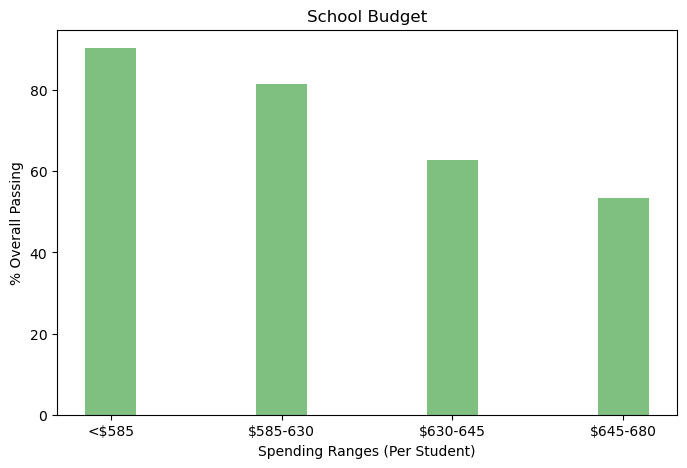

In [54]:
#Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,5))
plt.bar(x_axis, spending_summary["% Overall Passing"], width= 0.3, color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, ["<$585", "$585-630", "$630-645", "$645-680"])
plt.title("School Budget")
plt.xlabel("Spending Ranges (Per Student)")
plt.ylabel("% Overall Passing")

In [ ]:
#CONCLUSIONS: School Board should be more focused on math results improvements 
# (from average mark to high mark) espesially for District schools. 
# Low math results pull the overall passing grade down. 